In [3]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

import env
import os 

import wrangle_zillow

df = wrangle_zillow.acquire()

pd.options.display.max_rows = 100 

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

#import acquire
#import summarize
#import prepare

### Learning Goals 
- Acquire a sample of data from SQL.
- Identify null values, which nulls are 'deal-breakers', i.e. rows removed, which nulls should be represented by 0, and which should be replaced by a value from other methods, such as mean.
- Identify outliers and decide what to do with them, if anything (remove, keep as-is, replace).
- Data Structure: Aggregate as needed so that every row is an observation and each column is a variable (1 variable and not a measure).


In [4]:
wrangle_zillow.overview(df)

--- Shape: (77380, 68)
--- Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77380 entries, 0 to 77379
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77380 non-null  int64  
 1   parcelid                      77380 non-null  int64  
 2   airconditioningtypeid         24953 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77380 non-null  float64
 6   bedroomcnt                    77380 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49671 non-null  float64
 9   calculatedbathnbr             76771 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6023 non-null   float64
 12  calculatedfinishedsquarefeet

In [5]:
wrangle_zillow.nulls_by_columns(df).sort_values(by='percent')

,count,percent
id,0,0.00
propertylandusedesc,0,0.00
transactiondate,0,0.00
logerror,0,0.00
assessmentyear,0,0.00
roomcnt,0,0.00
regionidcounty,0,0.00
rawcensustractandblock,0,0.00
propertylandusetypeid,0,0.00
longitude,0,0.00


In [6]:
wrangle_zillow.nulls_by_rows(df)

n_missing  percent_missing
23         0.34                   2
24         0.35                  13
25         0.37                  24
26         0.38                  65
27         0.40                 316
28         0.41                 455
29         0.43                5270
30         0.44                3455
31         0.46                9891
32         0.47               12579
33         0.49               14782
34         0.50               13326
35         0.51                5148
36         0.53                5775
37         0.54                3620
38         0.56                1925
39         0.57                 285
40         0.59                 230
41         0.60                  29
42         0.62                  23
43         0.63                  28
44         0.65                  78
45         0.66                  50
46         0.68                   5
47         0.69                   3
48         0.71                   3
dtype: int64

In [7]:
print('Before dropping nulls, %d rows, %d cols' % df.shape)
df = wrangle_zillow.handle_missing_values(df, prop_required_column=.5, prop_required_row=.5)
print('After dropping nulls, %d rows, %d cols' % df.shape)

Before dropping nulls, 77380 rows, 68 cols
After dropping nulls, 60178 rows, 34 cols


### Mall Customers 

- Acquire data from the customers table in the mall_customers database.
- Summarize the data (include distributions and descriptive statistics).
- Detect outliers using IQR.
- Split data into train, validate, and test.
- Encode categorical columns using a one hot encoder (pd.get_dummies).
- Handles missing values.
- Scaling

In [10]:
database_url_base = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/'

In [11]:
def get_mall_customers(use_cache=True):
    if os.path.exists('mall_customers.csv') and use_cache:
        print('Using cached csv')
        return pd.read_csv('mall_customers.csv')
    print('Acquiring data from SQL database')
    query = 'SELECT * FROM customers'
    df = pd.read_sql(query, database_url_base + 'mall_customers')
    df.to_csv('mall_customers.csv', index=False)
    return df


In [12]:
mc_df = get_mall_customers()

Acquiring data from SQL database


In [71]:
#no missing values 
mc_df.isnull().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [79]:
#encode gender 
def one_hot_encoder(df):
    df['is_female'] 

In [80]:
mc_df.head(2)

,customer_id,gender,age,annual_income,spending_score,is_male
0,1,NaN,19,15,39,NaN
1,2,NaN,21,15,81,NaN


In [15]:
### Descriptive Statistics 
mc_df.describe()

,customer_id,age,annual_income,spending_score
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


array([[<AxesSubplot:title={'center':'customer_id'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'annual_income'}>,
        <AxesSubplot:title={'center':'spending_score'}>]], dtype=object)

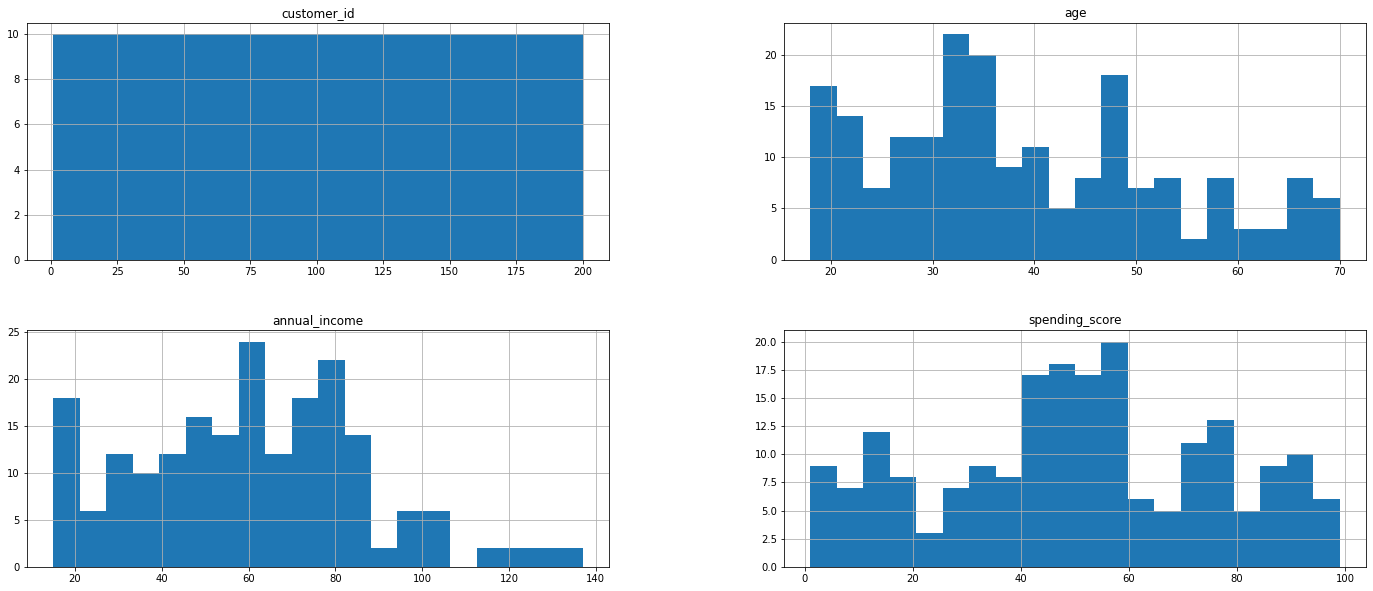

In [17]:
### Distributions 
mc_df.hist(figsize=(24, 10), bins=20)

In [32]:
def get_iqr():
    q1 = mc_df.quantile(0.25)
    q3 = mc_df.quantile(0.75)
    IQR = q3 - q1 
    return IQR

In [35]:
get_iqr()

customer_id                     99.50
age                             20.25
annual_income                   36.50
spending_score                  38.25
dtype: float64

In [43]:
def outer_limits(q1, q3, IQR):
    lower_bound = q1 -(IQR *1.5)
    upper_bound = q3 +(IQR *1.5)
    return lower_bound, upper_bound

In [44]:
#age outer limits
outer_limits(28.75, 49, 20.25)

(-1.625, 79.375)

In [45]:
#annual income outer limits 
outer_limits(41.50, 78, 36.50)

(-13.25, 132.75)

In [46]:
#spending score outer limits 
outer_limits(34.75, 73, 38.25)

(-22.625, 130.375)

In [21]:
### Detect outliers using IQR 
mc_df.age.describe()

count                 200.00
mean                   38.85
std                    13.97
min                    18.00
25%                    28.75
50%                    36.00
75%                    49.00
max                    70.00
Name: age, dtype: float64

In [22]:
mc_df.annual_income.describe()

count                 200.00
mean                   60.56
std                    26.26
min                    15.00
25%                    41.50
50%                    61.50
75%                    78.00
max                   137.00
Name: annual_income, dtype: float64

In [23]:
mc_df.spending_score.describe()

count                 200.00
mean                   50.20
std                    25.82
min                     1.00
25%                    34.75
50%                    50.00
75%                    73.00
max                    99.00
Name: spending_score, dtype: float64

In [51]:
mc_df[mc_df.age > 78]

,customer_id,gender,age,annual_income,spending_score


In [52]:
mc_df[mc_df.annual_income > 132]

,customer_id,gender,age,annual_income,spending_score
198,199,Male,32,137,18
199,200,Male,30,137,83


In [55]:
high_spenders = mc_df.spending_score > 130
mc_df[high_spenders]

,customer_id,gender,age,annual_income,spending_score


In [56]:
#best way to delete outliers 
mc_df.drop(mc_df[mc_df['annual_income'] > 132].index, inplace = True)

In [57]:
#outliers dropped 
mc_df[mc_df.annual_income > 132]

,customer_id,gender,age,annual_income,spending_score


In [58]:
#split data into train, validate, test 
def split_mall_data(df):
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    return train, validate, test

In [65]:
train, validate, test = split_mall_data(mc_df)

In [66]:
train.shape

(110, 5)

In [67]:
validate.shape

(48, 5)

In [68]:
test.shape

(40, 5)

In [81]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['age', 'annual_income', 'spending_score'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [84]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, columns_to_scale=['age', 'annual_income', 'spending_score'],return_scaler=False)

In [85]:
train_scaled.head(2)

,customer_id,gender,age,annual_income,spending_score
45,46,Female,0.12,0.22,0.65
39,40,Female,0.04,0.20,0.76


In [86]:
validate_scaled.head(2)

,customer_id,gender,age,annual_income,spending_score
176,177,Male,0.77,0.66,0.14
149,150,Male,0.31,0.57,0.91


In [88]:
test_scaled.head(2)

,customer_id,gender,age,annual_income,spending_score
156,157,Male,0.37,0.57,0.00
26,27,Female,0.52,0.12,0.32
